## CAPSTONE PROJECT ASSIGNMENT

### Applied Data Science Capstone Project by Zhansaya Zhapar

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Description](#data)
    * [New York Neighbourhoods Data Preparation](#newyork_data)
    * [Foursquare API Data Preparation](#foursquare)
    * [Airbnb Data Preparation](#airbnb)
* [Methodology](#methodology)
    * [Clustering the DATA](#clustering)
* [Analysis](#analysis)
    * [Data Visualization](#visuals)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [Future Work](#futurework)

## Introduction: Business Problem <a name="introduction"></a>

Every traveler knows how frustrating could be searching a place or even choosing neighborhood to live while visiting other cities and countries. And among those travelers there is a certain amount of people that prefer staying in apartment (private or shared) instead of using hotels. For example, there are many freelance workers that regularly travel around the world. However, their criteria for choosing a place to live differ from common touristic criteria. Therefore, I have decided to focus on people that plan to live a couple of months in New York and choose for that purpose the most suitable neighbourhood.

This project aims to explore New York city for clustering its neighbourhoods in Brooklyn based on criteria of travelers that would like to rent an apartment for a long stay.

To find such places people from all over the world use one of the most popular online marketplace services for arranging or offering lodging (primarily homestays, or tourism experiences) known as Airbnb. However, if we consider big cities like New York, we could imagine very huge amount of offers that Airbnb provides to a user.

This project is targeted to provide people traveling to New York convenient and user-oriented experience and, therefore, develop recommender systems of Airbnb. Nowadays such systems are the most effective ways to increase profits and help customers get best experiences at the same time. 

To find the optimal neighbourhood that could be interesting to a specific user, I would like to use the following priority list: 

1. **Number of outdoor and recreation venues nearby**
2. **Number of grocery shops nearby**
3. **Number of public transport spots nearby**
4. **Price**
5. **Number of reviews**

I believe that aforementioned factors are very important when you decide to live in a certain area for a while.
However, every user can rate these factors in different ways. For example, someone considers number of reviews as the most important priority, followed by proximity to sports and outdoor venues, availability of public transport and price in the end. However, other people would make their own preferences, where price would be in the first place.

I will try to use maximum of learned data science tools and techniques to properly cluster and recommend the user best options for their stay in NY based on the available data. 

In this project I will explore neighbourhoods in Brooklyn. 

## Data Description <a name="data"></a>
To fulfill the aim of my project I need to gather data that contain:

* location of a specific apartment in NY being offered in Airbnb
* the list and amount of outdoor and recreation venues in the neighborhood of that apartment
* the list and amount of transport venues in the neighborhood of that apartment
* the list and amount of grocery shops in the neighborhood of that apartment
* number of reviews made by users that stayed in that apartment 
* price of that apartment


Aforementioned data will be extracted and then processed from the following sources:

1. **Foursquare API:**

* all the required information about nearby venues in the neighborhood of that apartment 

2. **Airbnb open source data:** 

* price, number of reviews


Also, I will use geopy library to get the latitude and longitude values of New York City.



#### Data Preparation





Let's import all the required libraries:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

### New York Neighbourhoods Data Preparation  <a name="newyork_data"></a>

Now, let's download New York city data and load json file:

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's see, how our data looks like:

In [3]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Let's extract only the data that we need. As we see, it's stored in the "features":

In [4]:
neighbourhoods_data = newyork_data['features']

In [5]:
column_names = ['Borough', 'neighbourhood', 'latitude', 'longitude'] #initiate new dataframe's columns
neighbourhoods = pd.DataFrame(columns=column_names) #inititate the dataframe with these columns

In [6]:
#Function that will extract and write the data into our new dataframe:
for data in neighbourhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighbourhood_name = data['properties']['name']
        
    neighbourhood_latlon = data['geometry']['coordinates']
    neighbourhood_lat = neighbourhood_latlon[1]
    neighbourhood_lon = neighbourhood_latlon[0]
    
    neighbourhoods = neighbourhoods.append({'Borough': borough,
                                          'neighbourhood': neighbourhood_name,
                                          'latitude': neighbourhood_lat,
                                          'longitude': neighbourhood_lon}, ignore_index=True)

Let's see the first 5 lines of the dataframe that contains borough, neighbourhood and its coordinates information:

In [7]:
neighbourhoods.head()

,Borough,neighbourhood,latitude,longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Since for this project I have decided to focus on Brooklyn area, let's create new dataframe that will contain only the neighbourhoods in Brooklyn:

In [8]:
brooklyn_neighbourhoods = neighbourhoods[neighbourhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
print(brooklyn_neighbourhoods.shape)
brooklyn_neighbourhoods.head()

(70, 4)


,Borough,neighbourhood,latitude,longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


## Foursquare API Data Preparation <a name="foursquare"></a>

Now, in order to use FOURSQUARE API I am going to define credentials info:

In [9]:
CLIENT_ID = '5PJJA0IAXCNAXBXOYYZOWRQFU3KRLC23F4BPSXDF131LCKGF' # my Foursquare ID
CLIENT_SECRET = 'ELKIDEW2JAYKRZS4LWDJ0WRMMVJNLG4QY5HDF0TBEJSJSGZK' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 5PJJA0IAXCNAXBXOYYZOWRQFU3KRLC23F4BPSXDF131LCKGF
CLIENT_SECRET:ELKIDEW2JAYKRZS4LWDJ0WRMMVJNLG4QY5HDF0TBEJSJSGZK


Let's find how many outdoor venues are present in each neighbourhood:

Before making a request I have searched and found the id of outdoor and recreation venues, which is:
**4d4b7105d754a06377d81259**

In [10]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
def getNearbyOutdoorVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06377d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighbourhood', 
                 'neighbourhood Latitude', 
                 'neighbourhood Longitude', 
                 'Venue', 
                'Venue Latitude', 
                 'Venue Longitude', 
                 'Venue Category']
    
    return(nearby_venues)

In [11]:
# Brooklyn outdoor & recreation venues:
brooklyn_outdoor_venues = getNearbyOutdoorVenues(brooklyn_neighbourhoods['neighbourhood'],
                                   latitudes=brooklyn_neighbourhoods['latitude'],
                                   longitudes=brooklyn_neighbourhoods['longitude']
                                  )

Let's see what has been returned from our request:

In [12]:
brooklyn_outdoor_venues.head()

,neighbourhood,neighbourhood Latitude,neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Funtime USA,40.626297,-74.029701,Playground
1,Bay Ridge,40.625801,-74.030621,Monster Baseball Field,40.630378,-74.028043,Baseball Field
2,Bay Ridge,40.625801,-74.030621,Beach Bootay,40.623909,-74.033012,Vineyard
3,Bay Ridge,40.625801,-74.030621,Dahn Yoga,40.626273,-74.030208,Yoga Studio
4,Bay Ridge,40.625801,-74.030621,Bay Ridge Crossfit,40.624143,-74.030823,Gym / Fitness Center


We can see from the above in the categories that there are many venues like playgrounds, yoga studios and fitness centers in each neighbourhood. But we need to know differences between neighbourhoods and know exact number of interested venues:

In [13]:
# how many venues returned for each neighbourhood:
number_outdoor = brooklyn_outdoor_venues.groupby('neighbourhood').count()

In [14]:
number_outdoor = number_outdoor.rename(columns ={"neighbourhood Latitude": "number_of_outdoors"})
#Let's drop the columns that we not intereste in:
number_outdoor = number_outdoor.drop(['neighbourhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis = 1) 
number_outdoor.head()

,number_of_outdoors
neighbourhood,
Bath Beach,25
Bay Ridge,30
Bedford Stuyvesant,24
Bensonhurst,14
Bergen Beach,13


Let's find how many grocery stores are present in each neighbourhood:
(Id of this category is 4bf58dd8d48988d1f9941735)

In [17]:
def getNearbyFoodShops(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d1f9941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighbourhood', 
                 'neighbourhood Latitude', 
                 'neighbourhood Longitude', 
                 'Venue', 
                'Venue Latitude', 
                 'Venue Longitude', 
                 'Venue Category']
    
    return(nearby_venues)

In [18]:
brooklyn_food_shops = getNearbyFoodShops(brooklyn_neighbourhoods['neighbourhood'],
                                   latitudes=brooklyn_neighbourhoods['latitude'],
                                   longitudes=brooklyn_neighbourhoods['longitude']
                                  )

In [19]:
brooklyn_food_shops.head()

,neighbourhood,neighbourhood Latitude,neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Brooklyn Market,40.626939,-74.029948,Grocery Store
1,Bay Ridge,40.625801,-74.030621,Kings Cellars,40.625589,-74.030462,Liquor Store
2,Bay Ridge,40.625801,-74.030621,Associated Supermarket,40.628072,-74.029176,Grocery Store
3,Bay Ridge,40.625801,-74.030621,Met Foodmarkets,40.625382,-74.026549,Grocery Store
4,Bay Ridge,40.625801,-74.030621,Appletree natural foods,40.628165,-74.028864,Farmers Market


To extract the number of grocery & food shops nearby, let's create dataframe with numbers only:

In [20]:
number_food_shops = brooklyn_food_shops.groupby('neighbourhood').count()
number_food_shops = number_food_shops.rename(columns ={"neighbourhood Latitude": "number_of_food_shops"})
number_food_shops = number_food_shops.drop(['neighbourhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis = 1) 
number_food_shops.head()

,number_of_food_shops
neighbourhood,
Bath Beach,14
Bay Ridge,25
Bedford Stuyvesant,27
Bensonhurst,12
Boerum Hill,31


Now, let's explore travel and transport spots in each neighbourhood:
(id of this venue category is 4d4b7105d754a06379d81259)

In [21]:
def getNearbyTransport(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06379d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighbourhood', 
                 'neighbourhood Latitude', 
                 'neighbourhood Longitude', 
                 'Venue', 
                'Venue Latitude', 
                 'Venue Longitude', 
                 'Venue Category']
    
    return(nearby_venues)

In [22]:
brooklyn_transport = getNearbyTransport(brooklyn_neighbourhoods['neighbourhood'],
                                   latitudes=brooklyn_neighbourhoods['latitude'],
                                   longitudes=brooklyn_neighbourhoods['longitude']
                                  )
brooklyn_transport.head()

,neighbourhood,neighbourhood Latitude,neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,MTA Bus - 3 Av & 86 St (B16/B37),40.624007,-74.033274,Bus Stop
1,Bay Ridge,40.625801,-74.030621,MTA Subway - 86th St (R),40.622812,-74.028383,Metro Station
2,Bay Ridge,40.625801,-74.030621,3rd Ave,40.624310,-74.024782,Moving Target
3,Bay Ridge,40.625801,-74.030621,Enterprise Rent-A-Car,40.621121,-74.028314,Rental Car Location
4,Bay Ridge,40.625801,-74.030621,Best Western Gregory Hotel,40.624357,-74.027360,Hotel


Repeating the process of extracting the numbers for each neighburhood:

In [23]:
number_transport = brooklyn_transport.groupby('neighbourhood').count()
number_transport = number_transport.rename(columns ={"neighbourhood Latitude": "number_of_transportation_spots"})
number_transport = number_transport.drop(['neighbourhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis = 1) 
number_transport.head()

,number_of_transportation_spots
neighbourhood,
Bath Beach,21
Bay Ridge,24
Bedford Stuyvesant,41
Bensonhurst,7
Bergen Beach,1


Now, let's combine our data provided by Foursquare API:

In [91]:
merged_venues = pd.merge(number_transport, number_food_shops, on='neighbourhood')
merged_venues = pd.merge(merged_venues, number_outdoor, on='neighbourhood')
merged_venues.head()

,number_of_transportation_spots,number_of_food_shops,number_of_outdoors
neighbourhood,,,
Bath Beach,21,14,25
Bay Ridge,24,25,30
Bedford Stuyvesant,41,27,24
Bensonhurst,7,12,14
Boerum Hill,48,31,50


Let's see how many neighbourhoods our dataframe has:

In [148]:
merged_venues.shape

(66, 3)

### Airbnb Data Preparation <a name="airbnb"></a>

I downloaded listing.csv file with airbnb data from the following website:
http://insideairbnb.com/get-the-data.html

In [149]:
df_raw = pd.read_csv('listings.csv')
df_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,279,2019-08-29,4.62,1,192
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.59,1,13
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0


Let's drop unneccessary columns:

In [150]:
df = df_raw.drop(['name','host_id', 'minimum_nights', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis = 1) 
df.head()

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365
0,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,365
1,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,279,192
2,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9,0
3,5099,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,75,13
4,5121,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,49,0


In [151]:
df.shape

(48377, 10)

Now, it is important to identify missing values and decide how to handle them:

In [152]:
df_null = df[df.isna().any(axis=1)]
df_null

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365
224,60680,NaN,Manhattan,East Village,40.72654,-73.98049,Entire home/apt,99,134,313
773,289703,NaN,Manhattan,SoHo,40.72530,-73.99916,Entire home/apt,249,8,0
5426,4140622,NaN,Brooklyn,Bedford-Stuyvesant,40.68514,-73.93207,Entire home/apt,100,0,0
5807,4446862,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,0,0
6286,4763327,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,0
7816,6304803,NaN,Brooklyn,Clinton Hill,40.69322,-73.96554,Entire home/apt,300,1,0
7893,6360224,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,0
8731,6992973,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,0,0
9387,7556587,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,0
14144,11646497,NaN,Brooklyn,Bedford-Stuyvesant,40.68486,-73.93200,Private room,89,0,0


So, it has been found that only host names are missing. 
I will replace NaN by "Not specified" string value:

In [153]:
df = df.replace(np.nan, 'Not specified', regex=True)
#check loc 224 that name changed:
df.loc[224]

id                               60680
host_name                Not specified
neighbourhood_group          Manhattan
neighbourhood             East Village
latitude                       40.7265
longitude                     -73.9805
room_type              Entire home/apt
price                               99
number_of_reviews                  134
availability_365                   313
Name: 224, dtype: object

Now, let's double-check that we don't have any missing values:

In [154]:
print(df.isnull().sum().sum())

0


In [155]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48377 entries, 0 to 48376
Data columns (total 10 columns):
id                     48377 non-null int64
host_name              48377 non-null object
neighbourhood_group    48377 non-null object
neighbourhood          48377 non-null object
latitude               48377 non-null float64
longitude              48377 non-null float64
room_type              48377 non-null object
price                  48377 non-null int64
number_of_reviews      48377 non-null int64
availability_365       48377 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


Also, to clean the data and work with the relevant info, let's drop the listings that offer their apartment less than 100 days in a year. 

**Assumption 1:** I assume that the client would want to stay in apartment for 3 months in average.
So, let's first see, how many apartments would satisfy this assumption?

In [156]:
df_av = df.loc[df['availability_365'] > 100]
df_av.shape

(19272, 10)

In [157]:
#let's drop the listings with less than 100 days availability:
df = df[df['availability_365'] >= 100].reset_index(drop = True)
print(df.shape)
df.head()

(19323, 10)


,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365
0,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,365
1,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,279,192
2,5178,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,443,246
3,5222,Marilyn,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,116,94,347
4,5803,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,171,332


**Assumption 2:** The client wants to stay in separate entire apartment (not in a shared one):

In [158]:
df = df[df['room_type'] == 'Entire home/apt'].reset_index(drop = True)
print(df.shape)
df.head()

(10227, 10)


,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365
0,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,279,192
1,5222,Marilyn,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,116,94,347
2,6848,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,160,111
3,7097,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,199,203,311
4,7750,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,0,302


Now, we can delete columns with room type and availability from our dataframe:

In [159]:
df = df.drop(['room_type', 'availability_365'], axis = 1) 
df.head()

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,number_of_reviews
0,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,279
1,5222,Marilyn,Manhattan,East Village,40.72764,-73.97949,116,94
2,6848,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,140,160
3,7097,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,199,203
4,7750,Sing,Manhattan,East Harlem,40.79685,-73.94872,190,0


In [160]:
#What is the shape of our dataframe now:
df.shape

(10227, 8)

Let's see the unique boroughs, i.e. neighbourhood groups in the datframe:

In [161]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

Keeping in mind that for this particular project I am interested only in Brooklyn area, let's extract listing located in Brooklyn only:

In [162]:
df_brooklyn = df[df['neighbourhood_group'] == 'Brooklyn'].reset_index(drop=True)
print(df_brooklyn.shape)
df_brooklyn.head()

(3429, 8)


,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,number_of_reviews
0,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,279
1,6848,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,140,160
2,7097,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,199,203
3,8490,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,120,96
4,12299,Abdul,Brooklyn,South Slope,40.66278,-73.97966,120,15


Let's see, how many in how many neighbourhoods our left listings are located?

In [163]:
df_brooklyn['neighbourhood'].unique().shape

(48,)

Interesting that from Foursquare API, we have obtained nearby venues for 66 neighbourhoods of Brooklyn.

But only 48 out of them have apartments for renting by airbnb that satisfy our assumptions.

Now, I would like to group airbnb dataframe by neighbourhood and see the average price and the number of reviews for each:

In [164]:
df_airbnb = df_brooklyn.groupby('neighbourhood').mean()
df_airbnb = df_airbnb.drop(['id', 'latitude', 'longitude'], axis = 1) 
df_airbnb.head()

,price,number_of_reviews
neighbourhood,,
Bath Beach,132.800000,49.200000
Bay Ridge,205.542857,47.771429
Bedford-Stuyvesant,172.110818,61.992084
Bensonhurst,112.150000,57.400000
Bergen Beach,104.500000,23.125000


## Methodology <a name="methodology"></a>

### Merging all data in final dataframe:

In [165]:
df_final = pd.merge(df_airbnb, merged_venues, on='neighbourhood')

df_final.head()

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors
neighbourhood,,,,,
Bath Beach,132.800000,49.200000,21,14,25
Bay Ridge,205.542857,47.771429,24,25,30
Bensonhurst,112.150000,57.400000,7,12,14
Boerum Hill,225.282051,40.897436,48,31,50
Borough Park,146.166667,31.666667,22,16,2


In [166]:
df_final.shape

(38, 5)

### **Clustering the DATA:** <a name="clustering"></a>

## Modeling
In my project to cluster each customer group that wants to rent an apartment using airbnb, I would like to utilize the K-means clustering algorithm.

#### Let's prepare our dataset:


In [167]:
#from sklearn.preprocessing import StandardScaler
X = df_final.values
X = np.nan_to_num(X)

In [168]:
X

array([[132.8       ,  49.2       ,  21.        ,  14.        ,
         25.        ],
       [205.54285714,  47.77142857,  24.        ,  25.        ,
         30.        ],
       [112.15      ,  57.4       ,   7.        ,  12.        ,
         14.        ],
       [225.28205128,  40.8974359 ,  48.        ,  31.        ,
         50.        ],
       [146.16666667,  31.66666667,  22.        ,  16.        ,
          2.        ],
       [134.34782609,  28.82608696,  20.        ,  29.        ,
         30.        ],
       [287.84615385,  35.5       ,  38.        ,  26.        ,
         49.        ],
       [125.5       ,  55.25      ,  13.        ,  13.        ,
         20.        ],
       [158.41923077,  54.63461538,  39.        ,  24.        ,
         44.        ],
       [136.76119403,  54.53731343,  10.        ,   3.        ,
          9.        ],
       [222.68292683,  65.        ,  26.        ,  25.        ,
         44.        ],
       [347.52380952,  56.03809524,  41.   

I would like to see 4 different clusters.

n_init value which is the number of time the k-means algorithm will be run with different centroid seeds will be set to 12 (default is 10).

The final results will be the best output of n_init consecutive runs in terms of inertia.

In [169]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 1 0 0 2 0 3 0 1 2 3 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 2 1
 3]


In [171]:
df_clustered = df_final.copy()
df_clustered["Cluster"] = labels
df_clustered.head(5)

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors,Cluster
neighbourhood,,,,,,
Bath Beach,132.800000,49.200000,21,14,25,0
Bay Ridge,205.542857,47.771429,24,25,30,1
Bensonhurst,112.150000,57.400000,7,12,14,0
Boerum Hill,225.282051,40.897436,48,31,50,1
Borough Park,146.166667,31.666667,22,16,2,0


##### NOTE: each time the code runs, cluster numbers may change. The main characteristics stay approximately the same, but order might differ. 

To understand each cluster's characteristics, let's see mean values of each feature for different clusters:

In [172]:
df_final.head()

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors
neighbourhood,,,,,
Bath Beach,132.800000,49.200000,21,14,25
Bay Ridge,205.542857,47.771429,24,25,30
Bensonhurst,112.150000,57.400000,7,12,14
Boerum Hill,225.282051,40.897436,48,31,50
Borough Park,146.166667,31.666667,22,16,2


In [229]:
df_clustered.groupby('Cluster').mean()

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors
Cluster,,,,,
0,130.971854,37.428115,15.473684,11.052632,15.789474
1,216.059460,47.287296,33.769231,22.307692,39.000000
2,299.308506,43.105291,34.000000,20.333333,43.333333
3,161.209882,61.458761,27.000000,22.000000,45.333333


### Analysis <a name="analysis"></a>

Let's see the clustered data in more detail:

In [238]:
df_new = df_clustered.groupby('Cluster').mean()
df_new.describe()

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,201.887426,47.319866,27.560729,18.923414,35.864035
std,73.881424,10.255385,8.687554,5.318390,13.641607
min,130.971854,37.428115,15.473684,11.052632,15.789474
25%,153.650375,41.685997,24.118421,18.013158,33.197368
50%,188.634671,45.196293,30.384615,21.166667,41.166667
75%,236.871721,50.830162,33.826923,22.076923,43.833333
max,299.308506,61.458761,34.000000,22.307692,45.333333


Now, we can describe the clusters based on their differences and feature values:

**Cluster 1**

_Main characteristics:_ price is the lowest in these neighbourhoods. Also, apartments in these neighbourhoods are the least reviewed. The number of venues that we are interested in is minimum in each category.


In [233]:
df_clustered.loc[df_clustered['Cluster'] == 0]

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors,Cluster
neighbourhood,,,,,,
Bath Beach,132.800000,49.200000,21,14,25,0
Bensonhurst,112.150000,57.400000,7,12,14,0
Borough Park,146.166667,31.666667,22,16,2,0
Brighton Beach,134.347826,28.826087,20,29,30,0
Brownsville,125.500000,55.250000,13,13,20,0
Canarsie,136.761194,54.537313,10,3,9,0
Coney Island,159.000000,45.666667,6,8,27,0
Cypress Hills,123.303030,61.484848,21,10,14,0
Dyker Heights,122.285714,38.714286,18,9,19,0


**Cluster 2**

_Main characteristics:_ price is slightly higher than average in these neighbourhoods. Average number of reviews for these apartments is relatively high. The number of venues we are interested in is the highest (food shops) or almost close to maximum in other categories.


In [234]:
df_clustered.loc[df_clustered['Cluster'] == 1]

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors,Cluster
neighbourhood,,,,,,
Bay Ridge,205.542857,47.771429,24,25,30,1
Boerum Hill,225.282051,40.897436,48,31,50,1
Carroll Gardens,222.682927,65.000000,26,25,44,1
Crown Heights,213.711268,46.873239,24,17,18,1
Fort Greene,218.820513,48.782051,42,28,48,1
Gowanus,234.500000,48.886364,28,14,43,1
Greenpoint,196.173653,32.263473,41,45,44,1
Park Slope,211.683761,56.752137,36,23,46,1
Prospect Heights,233.285714,53.053571,37,27,46,1


**Cluster 3**

_Main characteristics:_ price is the highest in these neighbourhoods. The number of reviews is slightly below average. However, these areas are best in terms of availability of transport. The other venue categories that we are interested in are close to maximum in these neighbourhoods:


In [239]:
df_clustered.loc[df_clustered['Cluster'] == 2]

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors,Cluster
neighbourhood,,,,,,
Brooklyn Heights,287.846154,35.500000,38,26,49,2
Clinton Hill,347.523810,56.038095,41,25,45,2
Vinegar Hill,262.555556,37.777778,23,10,36,2


**Cluster 4**

_Main characteristics:_ price is less than average but higher than of Cluster 1. Average number of reviews is maximum (around 61). The number of sport and outdoor venues is maximum in these neighbourhoods. In terms of transport, these neighbourhoods have the average value, number of food shops is relatively close to maximum here:


In [240]:
df_clustered.loc[df_clustered['Cluster'] == 3]

,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors,Cluster
neighbourhood,,,,,,
Bushwick,158.419231,54.634615,39,24,44,3
Cobble Hill,170.866667,73.866667,25,28,48,3
Windsor Terrace,154.343750,55.875000,17,14,44,3


### Data Visualization <a name="visuals"></a>

In [179]:
df_visual = df_clustered.groupby('Cluster').mean()

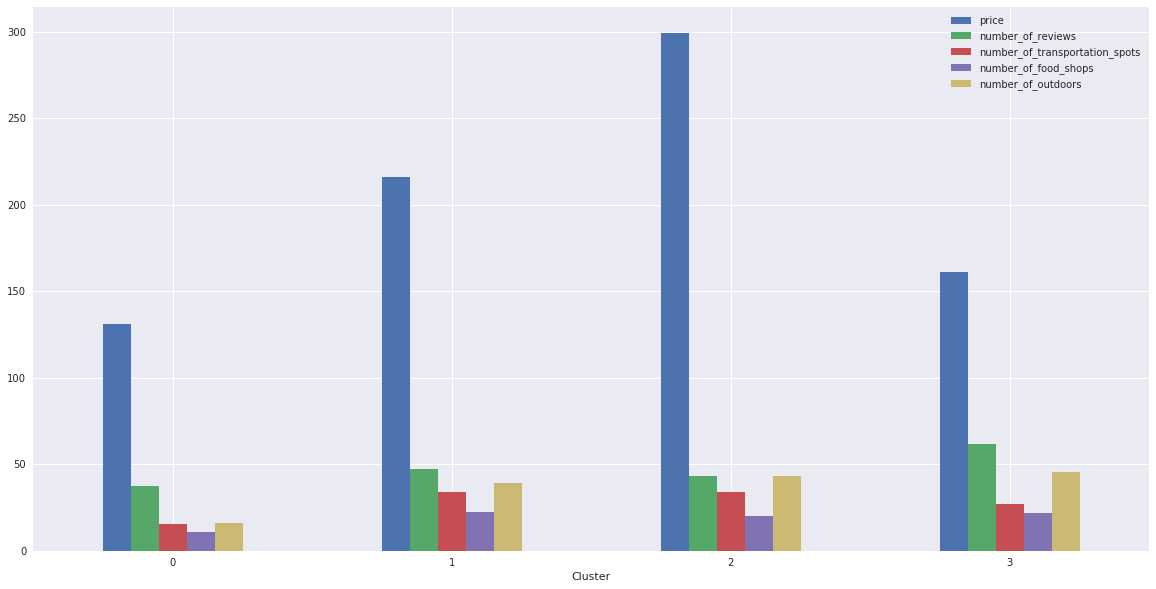

In [180]:
ax = df_visual.plot.bar(rot=0, figsize = (20,10))

In [225]:
df_price_sport = df_final[["price", "number_of_outdoors"]].copy()

df_price_food = df_final[["price", "number_of_food_shops"]].copy()

df_price_transport = df_final[["price", "number_of_transportation_spots"]].copy()

df_price_reviews = df_final[["price", "number_of_reviews"]].copy()

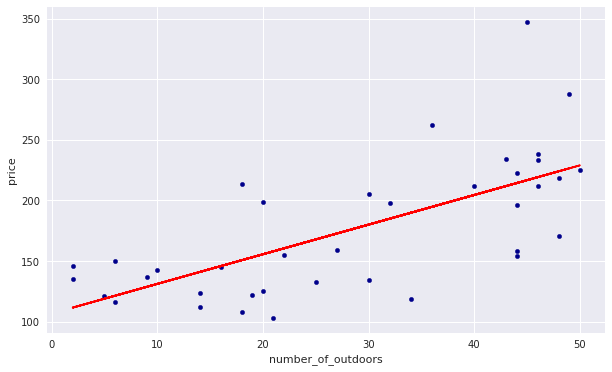

In [216]:
df_price_sport.plot(kind='scatter', x='number_of_outdoors', y='price', figsize=(10, 6), color='darkblue')
x1 = df_price_sport['number_of_outdoors']
y1 = df_price_sport['price']
fit = np.polyfit(x1, y1, deg=1)
plt.plot(x1, fit[0] * x1 + fit[1], color='red') 

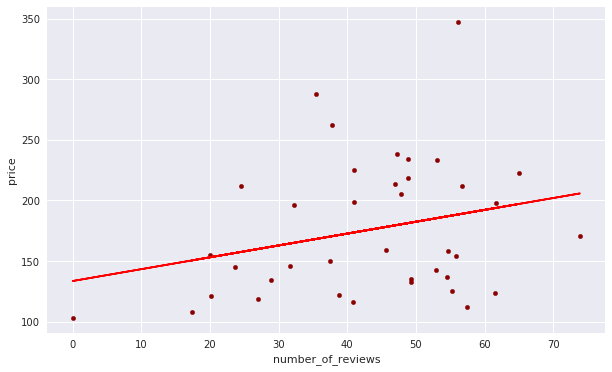

In [218]:
df_price_reviews.plot(kind='scatter', x='number_of_reviews', y='price', figsize=(10, 6), color='darkred')
x2 = df_price_reviews['number_of_reviews']
y2 = df_price_reviews['price']
fit = np.polyfit(x2, y2, deg=1)
plt.plot(x2, fit[0] * x2 + fit[1], color='red') 

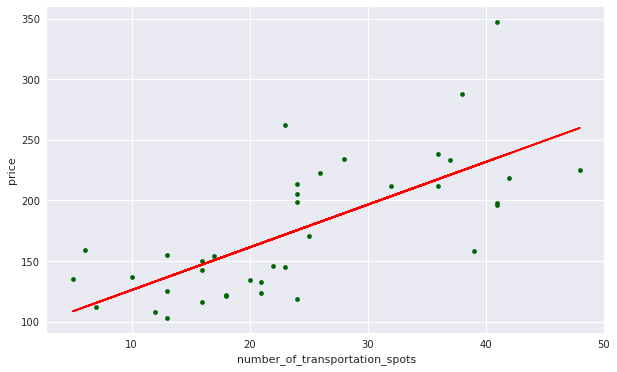

In [219]:
df_price_transport.plot(kind='scatter', x='number_of_transportation_spots', y='price', figsize=(10, 6), color='darkgreen')
x3 = df_price_transport['number_of_transportation_spots']
y3 = df_price_transport['price']
fit = np.polyfit(x3, y3, deg=1)
plt.plot(x3, fit[0] * x3 + fit[1], color='red') 

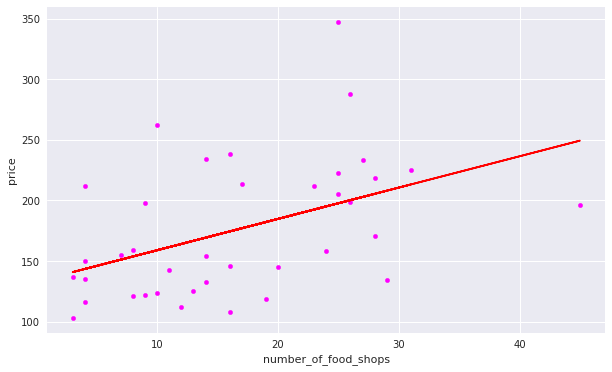

In [220]:
df_price_food.plot(kind='scatter', x='number_of_food_shops', y='price', figsize=(10, 6), color='magenta')
x4 = df_price_food['number_of_food_shops']
y4 = df_price_food['price']
fit = np.polyfit(x, y, deg=1)
plt.plot(x4, fit[0] * x4 + fit[1], color='red') 

As we see, all of the features tend to increase in value when price is higher. 

## Visualization on MAP

Let's add to our final datframe the coordinates of each neighbourhood in order to see them on the map:

In [251]:
brooklyn_neighbourhoods.head()

,Borough,neighbourhood,latitude,longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


Now, let's merge this data with our clustered dataframe:

In [274]:
df_loc = pd.merge(df_clustered, brooklyn_neighbourhoods, on='neighbourhood')
df_loc.head()

,neighbourhood,price,number_of_reviews,number_of_transportation_spots,number_of_food_shops,number_of_outdoors,Cluster,Borough,latitude,longitude
0,Bath Beach,132.800000,49.200000,21,14,25,0,Brooklyn,40.599519,-73.998752
1,Bay Ridge,205.542857,47.771429,24,25,30,1,Brooklyn,40.625801,-74.030621
2,Bensonhurst,112.150000,57.400000,7,12,14,0,Brooklyn,40.611009,-73.995180
3,Boerum Hill,225.282051,40.897436,48,31,50,1,Brooklyn,40.685683,-73.983748
4,Borough Park,146.166667,31.666667,22,16,2,0,Brooklyn,40.633131,-73.990498


First, let's just see all of the neighbourhods of Brooklyn unclustered on the map:

In [275]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [276]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [277]:
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

Now, let's see clustered neighbourhoods:

In [279]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_loc['latitude'], df_loc['longitude'], df_loc['neighbourhood'], df_loc['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

The goal of this project was to explore the neighbourhoods in Brooklyn for choosing best areas for a long stay in NYC to a traveler that is interested in renting entire apartment through Airbnb service. I also made several assumptions when choosing features for the analysis. Except the price and number of reviews, I decided to consider proximity to venues like various sport centers, yoga studios, parks and playgrounds, since I believe it is a good feature to take into account when choosing a place to live. All of these venues were gathered in Foursquare API under id of outdoor & recreation venues. Second feature extracted from foursquare API was proximity to various grocery stores, and the third was availability of transport around. All of these information was put together for clustering and analysis.

Results have shown, that even if Brooklyn has 66 neighbourhoods, our assumptions and available data from airbnb gave us only 38 neighbourhoods to consider. All of these neighbourhoods were clustered by K-Means method, which resulted in 4 different groups. In general, visualization of price values versus other features showed that the more expensive the apartment, the more venues of our interested are located around. However there is a cluster that has apartments with the highest number of reviews and maximum number of sport venues around, but is cheaper than average (Cluster 4). This means that each traveler after reviewing general neighbourhood feature characteristics can choose the area based on his or her own personal priorities.




## Conclusion <a name="conclusion"></a>


Purpose of this project was to identify Brooklyn neighbourhoods in terms of price, number of reviews and density of sport venues, grocery stores and transportation around. After requesting and getting the data on venue densities around each neighbourhood from Foursquare API, airbnb data was cleaned and prepared to be added to final dataframe. Then, k-means clustering algorithm was deployed in order to distinguish between neighbourhoods and see their differentiating feature values. Also, the data has been visualized using bar charts. Scatter plots were used to show the dependence of our features on price. Finally, clustered neighbourhoods were shown on the map of New York using folium library. 


Final decission on optimal neighbourhood will be made by clients that plan to rent an apartment based on specific characteristics of neighborhoods and locations in every clustered zone, taking into account density of discussed venues, number of reviews and prices.



##### Future Work <a name="futurework"></a>

As a future work I would consider exploration of real reviews to make text analysis on them. Also, other venues like shopping centers and attractions can be searched and counted to be extra features for choosing an apartment. In addition, the problem can be turned towards new hosts that want to give their apartment or buy a new one for the purpose of renting for a long stay such that these hosts understand the need of important venues around their apartment and make better decision. 